In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import os
from matplotlib_venn import venn2


In [3]:
marker_df = pd.read_csv('Human_blood_marker_processed.csv')
print(marker_df.shape)
marker_df.head()

(147, 6)


,Species,Tissue,super_type,CellType,Marker,Resource
0,Human,Blood,B,Activated B cell,"CD5, MIR155HG, TAGLN2","35025971, 28910360, 2474446"
1,Human,Blood,T_CD4,"Activated CD4-positive, alpha-beta T cell","CD4, CCR6, CD14, CD19, CD38, CD3D, CD3G, CD69,...","35381424, 32783921, 35831277, 34529726, 103413..."
2,Human,Blood,T_CD4,"Activated CD4-positive, CD25-positive, CCR4-po...","CD3D, CD3E, CD3G, CD4, FOXP3",30977974
3,Human,Blood,NaN,Adult endothelial progenitor cell,"KDR, PROM1, CD34, PTPRC, PECAM1, CD14","27561827, 29391882, 24641802, 29147957, 267700..."
4,Human,Blood,T,Alpha-beta T cell,"CD3D, CD3E, CD3G, IL7R","34284174, 28777444"


In [4]:
marker_df['super_type'].unique()

array(['B', 'T_CD4', nan, 'T', 'Monocyte', 'DC', 'NK', 'T_CD4_cytotoxic',
       'T_CD4_memory', 'T_CD8_cytotoxic', 'T_CD8_memory', 'T_CD8',
       'T_CD4_Tcm', 'T_CD8_Tcm', 'T_cm', 'B_memory', 'T_CD4_Tem', 'T_em',
       'T_CD8_Tem', 'Erythrocyte', 'T_helper', 'T_reg', 'T_memory',
       'B_naive', 'Platelet'], dtype=object)

In [5]:
marker_df['CellType'].unique()

array(['Activated B cell', 'Activated CD4-positive, alpha-beta T cell',
       'Activated CD4-positive, CD25-positive, CCR4-positive, alpha-beta regulatory T cell, human',
       'Adult endothelial progenitor cell', 'Alpha-beta T cell',
       'Alternatively activated macrophage', 'Atypical B cell', 'B cell',
       'Basophil', 'Cardiac muscle cell',
       'CD14-low, CD16-positive monocyte', 'CD14-positive monocyte',
       'CD14-positive, CD16-negative classical monocyte',
       'CD14-positive, CD16-positive monocyte',
       'CD141-positive, CLEC9A-positive dendritic cell',
       'CD16-negative natural killer cell',
       'CD16-negative, CD56-bright natural killer cell, human',
       'CD16-positive myeloid dendritic cell',
       'CD16-positive natural killer cell',
       'CD16-positive, CD56-dim natural killer cell, human',
       'CD1c-positive myeloid dendritic cell', 'CD38-positive B cell',
       'CD4-intermediate, CD8-positive double-positive thymocyte',
       'CD4-posit

## Read PreLect features

In [6]:
types = ['ASDC', 'B_intermediate', 'B_memory', 'B_naive', 'CD14_Mono', 'CD16_Mono', 'CD4_CTL', 'CD4_Naive', 'CD4_Proliferating', 'CD4_TCM', 'CD4_TEM', 'CD8_Naive', 'CD8_Proliferating', 'CD8_TCM', 'CD8_TEM', 'Doublet', 'Eryth', 'HSPC', 'ILC', 'MAIT', 'NK', 'NK_CD56bright', 'NK_Proliferating', 'Plasmablast', 'Platelet', 'Treg', 'cDC1', 'cDC2', 'dnT', 'gdT', 'pDC']

In [7]:
# os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level2/feature_selection_k3')
os.chdir(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/feature_selection_k3')

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df_k3 = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[celltype] = feature_df_k3
    except:
        print('skipping:', celltype)
        continue

count_df_k3 = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df_k3 = features_dict[celltype]
    feature_count = feature_df_k3.shape[0]
    positive_count = feature_df_k3[feature_df_k3['Tendency'] == 1].shape[0]
    count_df_k3.loc[celltype] = [feature_count, positive_count]
count_df_k3

,Feature_count,Positive_feature_count
ASDC,47,25
B_intermediate,96,49
B_memory,170,90
B_naive,9,6
CD14_Mono,29,16
CD16_Mono,37,17
CD4_CTL,122,45
CD4_Naive,730,393
CD4_Proliferating,70,35
CD4_TCM,247,133


In [41]:
# Do two comparisons:
#   1. All_PreLect vs. Marker in database
#   2. Positive_PreLect vs. Marker in database
def compare_PreLect_w_marker(celltype, PreLect_dict, marker_genes, name=''):
    if name == '':
        name = celltype
    # Extracting the features and marker genes
    feature_df = PreLect_dict[celltype]
    features = feature_df['Gene'].tolist()
    positve_features = feature_df[feature_df['Tendency'] == 1]['Gene'].tolist()
    # marker_genes = marker_df['official gene symbol'].tolist()

    ### All features
    # Finding common elements
    common_all = list(set(features) & set(marker_genes))
    print(celltype, 'All features common with markers:', len(common_all))
    # Preparing sets for Venn diagram
    features_set = set(features)
    marker_genes_set = set(marker_genes)
    # Plotting Venn diagram
    plt.figure(figsize=(8, 5))
    v = venn2([features_set, marker_genes_set], set_labels=('PreLect all', f'{name} Marker'))
    for idx in ('10', '01', '11'):  # Each region in a 2-set Venn diagram
        if v.get_label_by_id(idx) and int(v.get_label_by_id(idx).get_text()) == 0:
            v.get_label_by_id(idx).set_text('')
    plt.title(name, fontsize=16)
    for text in v.set_labels:
        text.set_fontsize(14)
    for text in v.subset_labels:
        text.set_fontsize(16)
    plt.show()

    ### Positive features
    # Finding common elements
    common_positive = list(set(positve_features) & set(marker_genes))
    print(celltype, 'Positive features common with markers:', len(common_positive))
    # Preparing sets for Venn diagram
    positive_features_set = set(positve_features)
    marker_genes_set = set(marker_genes)
    # Plotting Venn diagram
    plt.figure(figsize=(8, 5))
    v = venn2([positive_features_set, marker_genes_set], set_labels=('PreLect positive', f'{name} Marker'), set_colors=('blue', 'green'))
    for idx in ('10', '01', '11'):  # Each region in a 2-set Venn diagram
        if v.get_label_by_id(idx) and int(v.get_label_by_id(idx).get_text()) == 0:
            v.get_label_by_id(idx).set_text('')
    plt.title(name, fontsize=16)
    for text in v.set_labels:
        print(text)
        text.set_fontsize(14)
    for text in v.subset_labels:
        text.set_fontsize(16)
    plt.show()

    return common_all, common_positive


In [42]:
def get_celltype_marker(name, marker_df):
    string = marker_df[marker_df['CellType'] == name]['Marker'].tolist()[0]
    marker_list = string.split(', ')
    return marker_list

## Function for running comparison

In [43]:
def run_compare(clus_name, act_name, features_dict, marker_df, marker_list=None):
    if marker_list:
        common, common_p = compare_PreLect_w_marker(clus_name, features_dict, marker_list, name=clus_name)
    else:
        common, common_p = compare_PreLect_w_marker(clus_name, features_dict, get_celltype_marker(act_name, marker_df), name=clus_name)
    print(f'{clus_name}_common:', common)
    print(f'{clus_name}_common_p:', common_p)

B_memory All features common with markers: 5


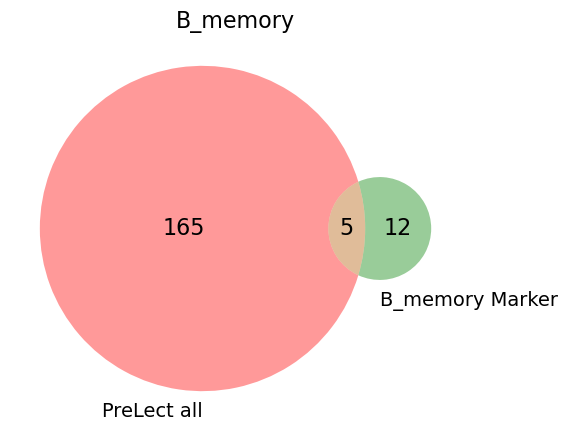

B_memory Positive features common with markers: 4


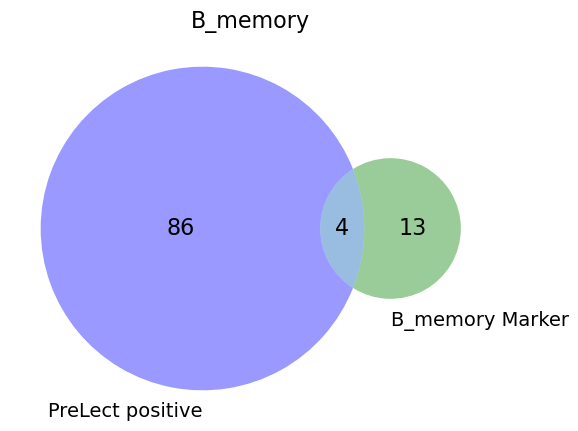

B_memory_common: ['IGHM', 'MS4A1', 'AIM2', 'IGHG3', 'IGHG1']
B_memory_common_p: ['IGHG1', 'IGHG3', 'MS4A1', 'AIM2']


In [12]:
clus = 'B_memory'
name = 'Memory B cell'
run_compare(clus, name, features_dict, marker_df)

B_naive All features common with markers: 4


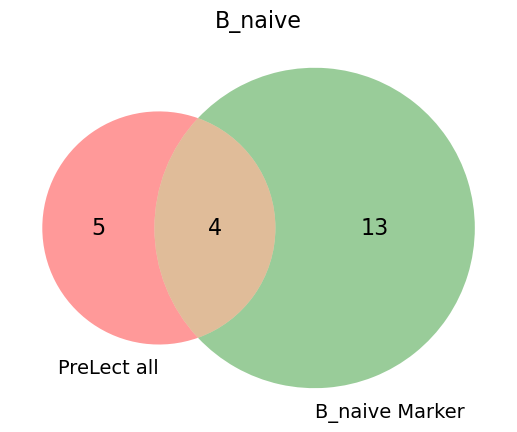

B_naive Positive features common with markers: 4


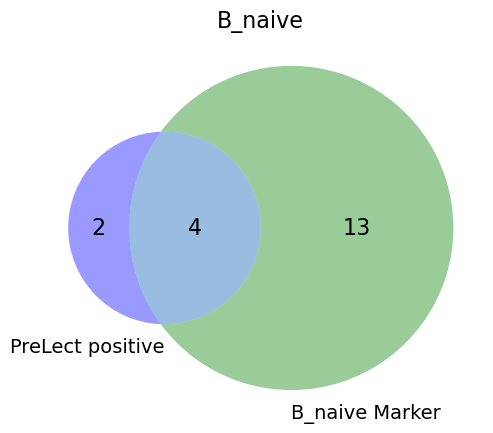

B_naive_common: ['TCL1A', 'IGHD', 'IGHM', 'MS4A1']
B_naive_common_p: ['TCL1A', 'IGHD', 'IGHM', 'MS4A1']


In [13]:
clus = 'B_naive'
name = 'Naive B cell'
run_compare(clus, name, features_dict, marker_df)

CD14_Mono All features common with markers: 9


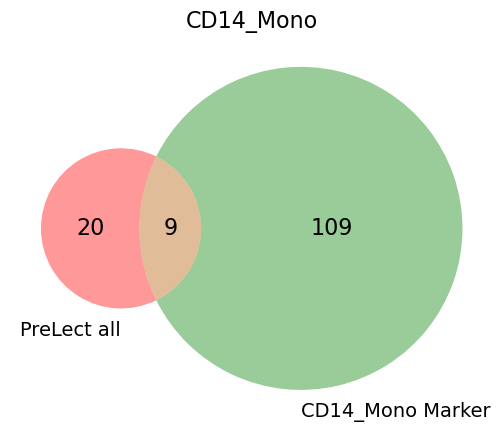

CD14_Mono Positive features common with markers: 9


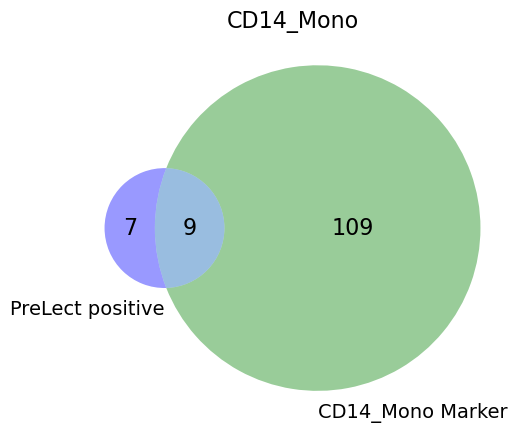

CD14_Mono_common: ['VCAN', 'CEBPD', 'CD14', 'NEAT1', 'LYZ', 'MS4A6A', 'S100A9', 'S100A8', 'FCN1']
CD14_Mono_common_p: ['VCAN', 'CD14', 'CEBPD', 'NEAT1', 'LYZ', 'S100A9', 'S100A8', 'MS4A6A', 'FCN1']


In [15]:
clus = 'CD14_Mono'
name = 'Classical monocyte'
run_compare(clus, name, features_dict, marker_df)

CD16_Mono All features common with markers: 7


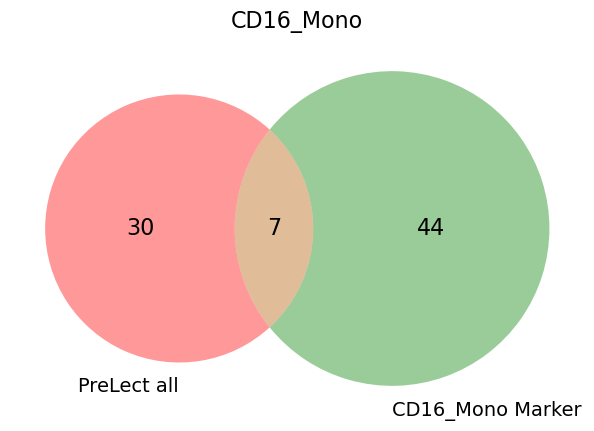

CD16_Mono Positive features common with markers: 7


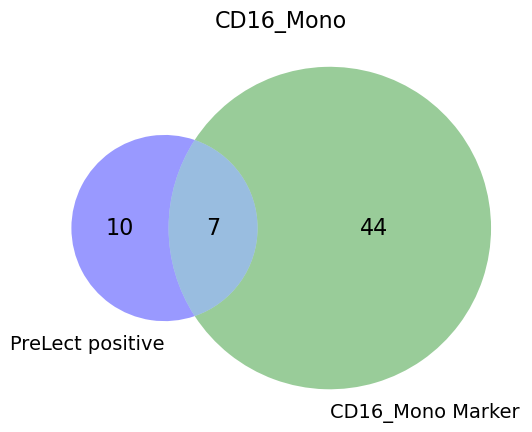

CD16_Mono_common: ['FCGR3A', 'CDKN1C', 'AIF1', 'LST1', 'TCF7L2', 'FCER1G', 'CST3']
CD16_Mono_common_p: ['FCGR3A', 'CDKN1C', 'AIF1', 'LST1', 'TCF7L2', 'FCER1G', 'CST3']


In [16]:
clus = 'CD16_Mono'
name = 'Non-classical monocyte'
run_compare(clus, name, features_dict, marker_df)

CD4_Proliferating All features common with markers: 3


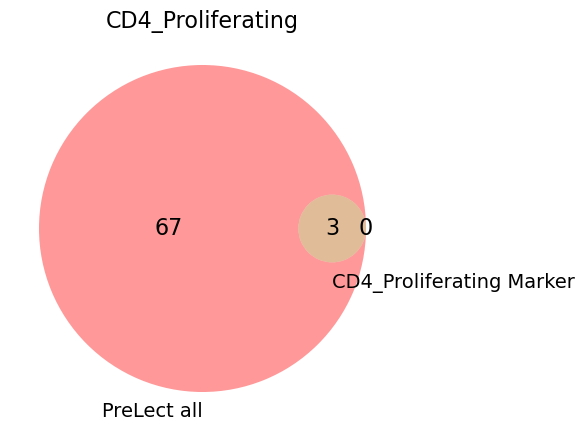

CD4_Proliferating Positive features common with markers: 3


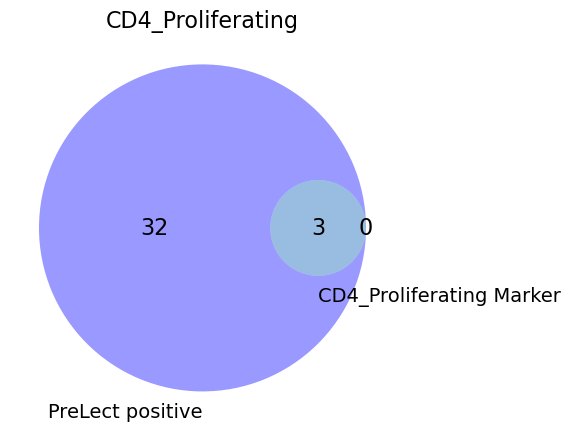

CD4_Proliferating_common: ['MKI67', 'STMN1', 'TUBA1B']
CD4_Proliferating_common_p: ['MKI67', 'STMN1', 'TUBA1B']


In [17]:
clus = 'CD4_Proliferating'
name = 'Proliferating CD4-positive, alpha-beta T cell'
run_compare(clus, name, features_dict, marker_df)

CD4_TCM All features common with markers: 18


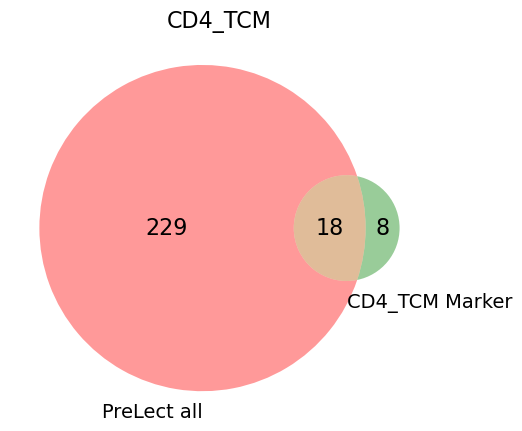

CD4_TCM Positive features common with markers: 17


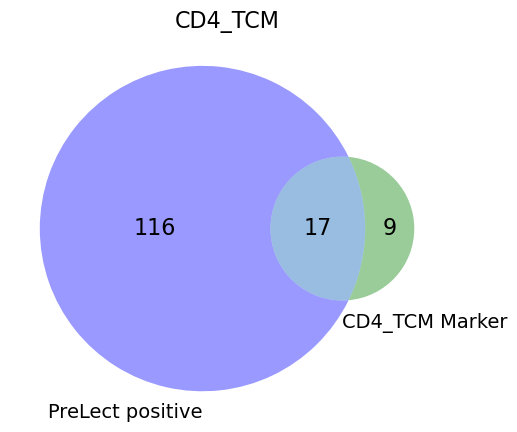

CD4_TCM_common: ['CD3E', 'TMSB10', 'LDHB', 'KLF2', 'CD3D', 'CD69', 'AQP3', 'MAL', 'CD4', 'SELL', 'ZFP36L2', 'IL32', 'ANXA1', 'TRAC', 'IL7R', 'ITGB1', 'LTB', 'CD3G']
CD4_TCM_common_p: ['CD3E', 'TMSB10', 'LDHB', 'KLF2', 'CD3D', 'CD69', 'AQP3', 'MAL', 'CD4', 'ZFP36L2', 'ANXA1', 'IL32', 'IL7R', 'TRAC', 'ITGB1', 'LTB', 'CD3G']


In [18]:
clus = 'CD4_TCM'
name = 'Central memory CD4-positive, alpha-beta T cell'
run_compare(clus, name, features_dict, marker_df)

CD4_TEM All features common with markers: 10


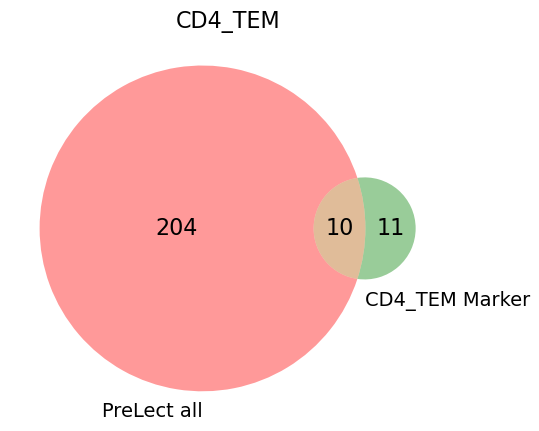

CD4_TEM Positive features common with markers: 7


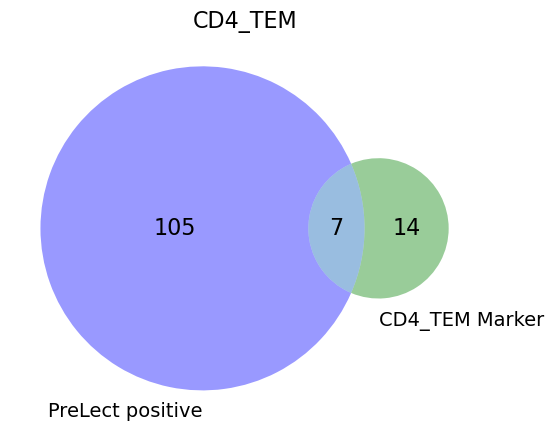

CD4_TEM_common: ['GZMK', 'GNLY', 'CCL5', 'CD4', 'GZMA', 'IL7R', 'ITGB1', 'KLRB1', 'PTPRC', 'CD3G']
CD4_TEM_common_p: ['GZMK', 'CCL5', 'CD4', 'GZMA', 'IL7R', 'KLRB1', 'CD3G']


In [19]:
clus = 'CD4_TEM'
name = 'Effector memory CD4-positive, alpha-beta T cell'
run_compare(clus, name, features_dict, marker_df)

CD8_Naive All features common with markers: 9


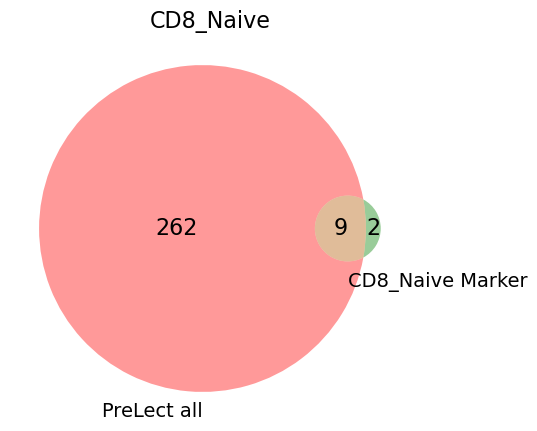

CD8_Naive Positive features common with markers: 8


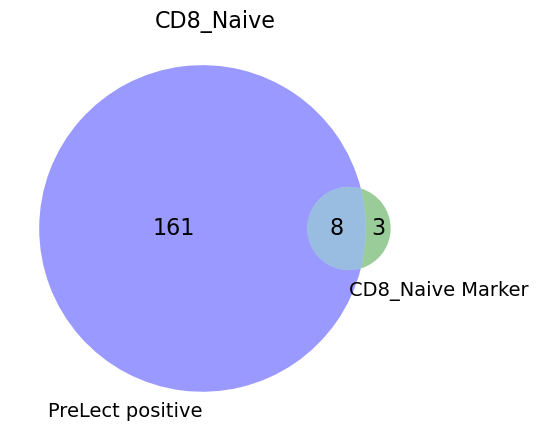

CD8_Naive_common: ['LEF1', 'CD8B', 'CD3E', 'CD3D', 'CCR7', 'SELL', 'IL7R', 'CD8A', 'CD27']
CD8_Naive_common_p: ['LEF1', 'CD8B', 'CD3E', 'CD3D', 'CCR7', 'SELL', 'CD8A', 'CD27']


In [20]:
clus = 'CD8_Naive'
name = 'Naive thymus-derived CD8-positive, alpha-beta T cell'
run_compare(clus, name, features_dict, marker_df)

CD8_TEM All features common with markers: 15


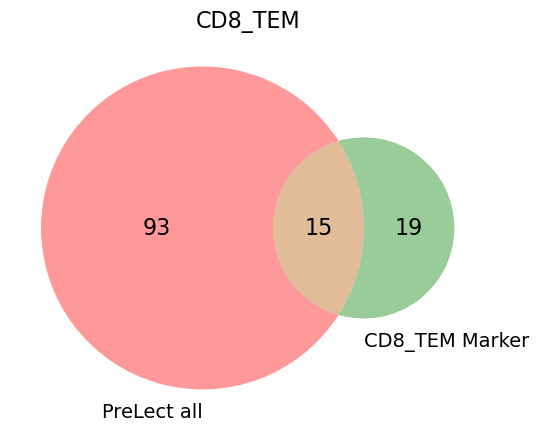

CD8_TEM Positive features common with markers: 12


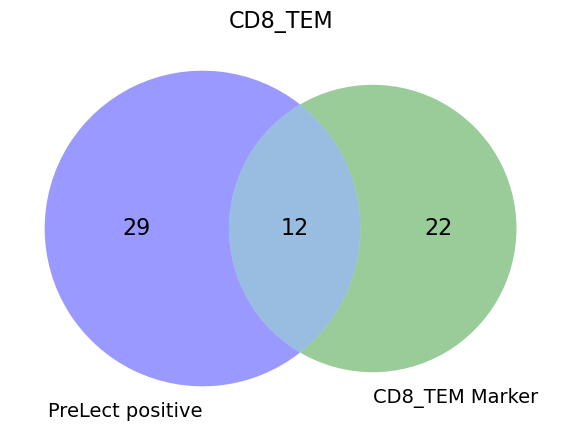

CD8_TEM_common: ['GZMH', 'GZMK', 'NKG7', 'GNLY', 'CCL5', 'TRGC2', 'CD8B', 'PRF1', 'KLRD1', 'CD3D', 'CST7', 'GZMA', 'TRAC', 'CD8A', 'CD3G']
CD8_TEM_common_p: ['GZMH', 'GZMK', 'NKG7', 'CCL5', 'TRGC2', 'CD8B', 'KLRD1', 'CD3D', 'CST7', 'TRAC', 'CD8A', 'CD3G']


In [21]:
clus = 'CD8_TEM'
name = 'Effector memory CD8-positive, alpha-beta T cell'
run_compare(clus, name, features_dict, marker_df)

cDC1 All features common with markers: 3


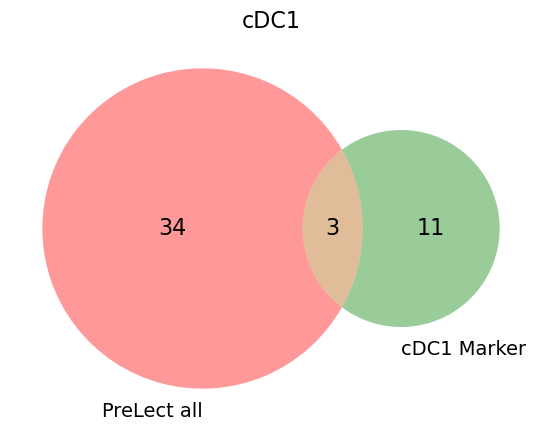

cDC1 Positive features common with markers: 3


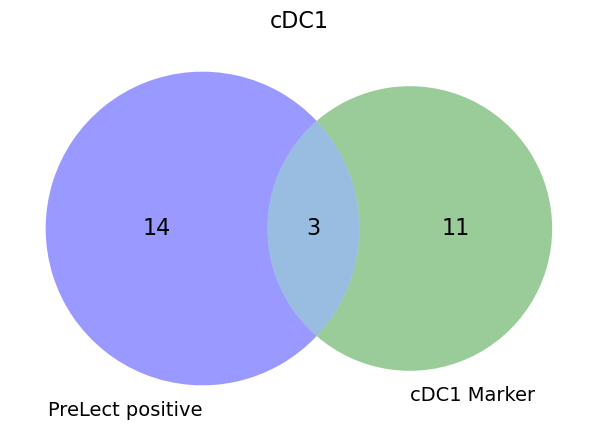

cDC1_common: ['HLA-DPA1', 'CLEC9A', 'BATF3']
cDC1_common_p: ['HLA-DPA1', 'CLEC9A', 'BATF3']


In [22]:
clus = 'cDC1'
name = 'Type 1 conventional dendritic cell'
run_compare(clus, name, features_dict, marker_df)

cDC2 All features common with markers: 2


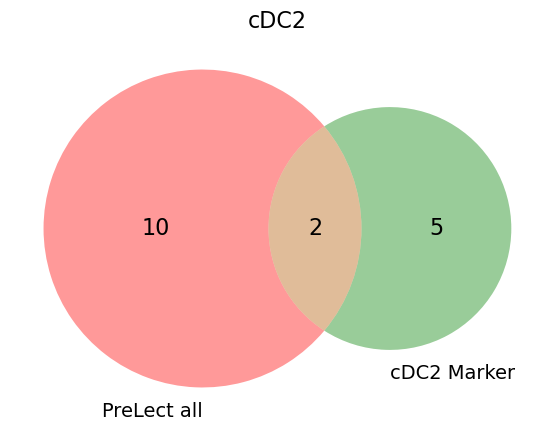

cDC2 Positive features common with markers: 2


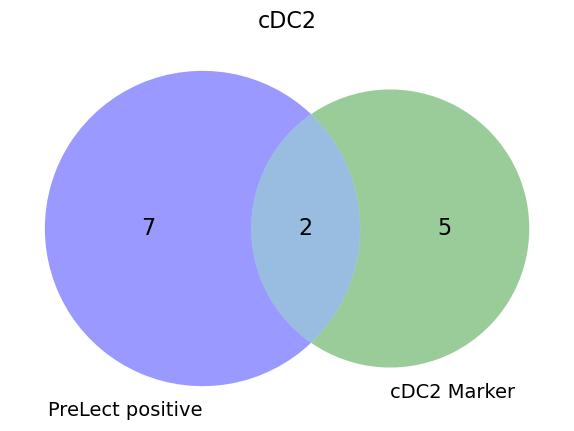

cDC2_common: ['FCER1A', 'CLEC10A']
cDC2_common_p: ['FCER1A', 'CLEC10A']


In [23]:
clus = 'cDC2'
name = 'Type 2 conventional dendritic cell'
run_compare(clus, name, features_dict, marker_df)

gdT All features common with markers: 5


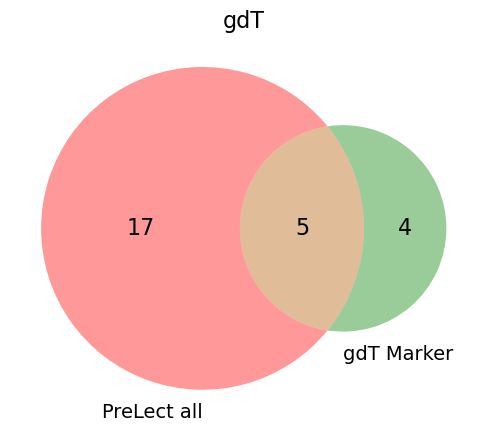

gdT Positive features common with markers: 5


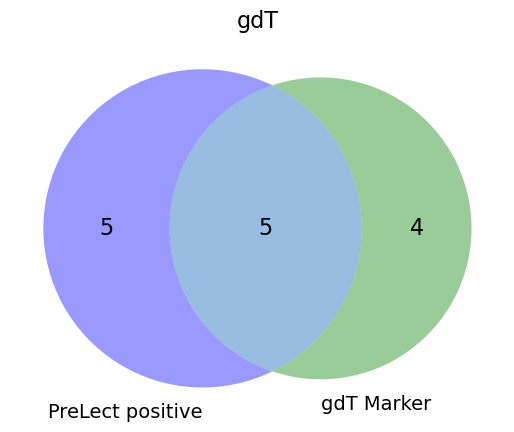

gdT_common: ['CD3E', 'CD3D', 'TRGC1', 'TRDC', 'TRGC2']
gdT_common_p: ['CD3E', 'CD3D', 'TRGC1', 'TRDC', 'TRGC2']


In [24]:
clus = 'gdT'
name = 'Gamma-delta T cell'
run_compare(clus, name, features_dict, marker_df)

HSPC All features common with markers: 2


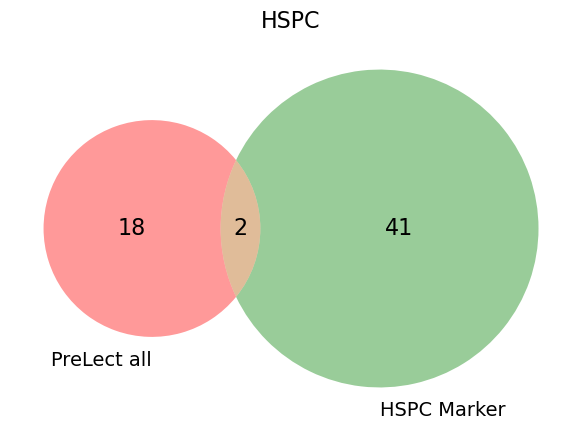

HSPC Positive features common with markers: 2


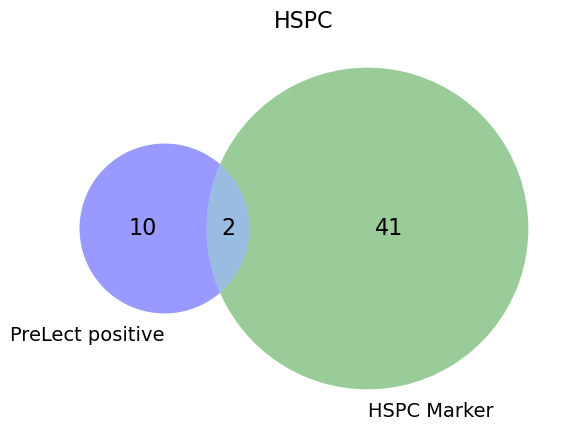

HSPC_common: ['SOX4', 'SPINK2']
HSPC_common_p: ['SOX4', 'SPINK2']


In [25]:
clus = 'HSPC'
name = 'Hematopoietic stem cell'
run_compare(clus, name, features_dict, marker_df)

MAIT All features common with markers: 6


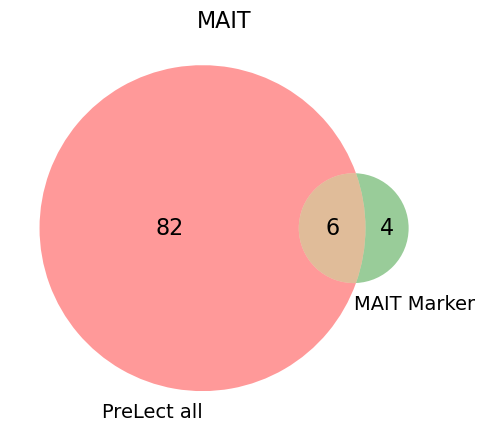

MAIT Positive features common with markers: 6


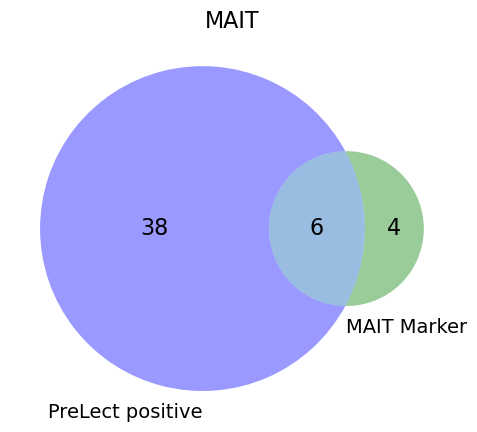

MAIT_common: ['SLC4A10', 'CD3D', 'CXCR4', 'CD8A', 'KLRB1', 'MAF']
MAIT_common_p: ['SLC4A10', 'CD3D', 'CXCR4', 'CD8A', 'KLRB1', 'MAF']


In [26]:
clus = 'MAIT'
name = 'Mucosal invariant T cell'
run_compare(clus, name, features_dict, marker_df)

pDC All features common with markers: 4


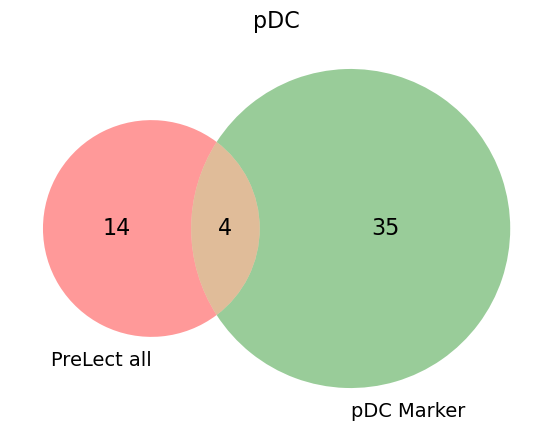

pDC Positive features common with markers: 4


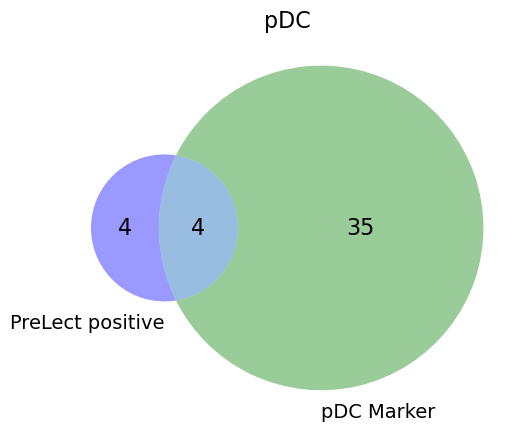

pDC_common: ['IRF8', 'GZMB', 'IRF7', 'JCHAIN']
pDC_common_p: ['IRF8', 'GZMB', 'IRF7', 'JCHAIN']


In [27]:
clus = 'pDC'
name = 'Plasmacytoid dendritic cell'
run_compare(clus, name, features_dict, marker_df)

Treg All features common with markers: 11


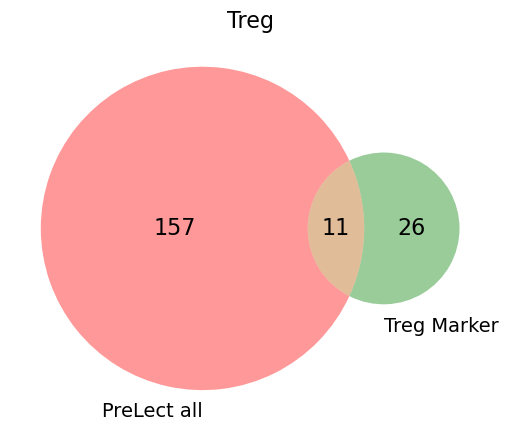

Treg Positive features common with markers: 8


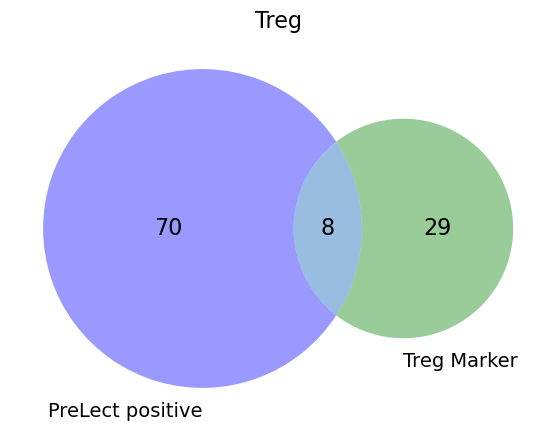

Treg_common: ['ITGA4', 'RTKN2', 'CD52', 'IKZF2', 'TIGIT', 'IL2RA', 'CD27', 'IL7R', 'ISG20', 'FOXP3', 'CD3G']
Treg_common_p: ['RTKN2', 'IKZF2', 'TIGIT', 'IL2RA', 'CD27', 'ISG20', 'FOXP3', 'CD3G']


In [28]:
clus = 'Treg'
name = 'Regulatory T cell'
run_compare(clus, name, features_dict, marker_df)

CD4_CTL All features common with markers: 3


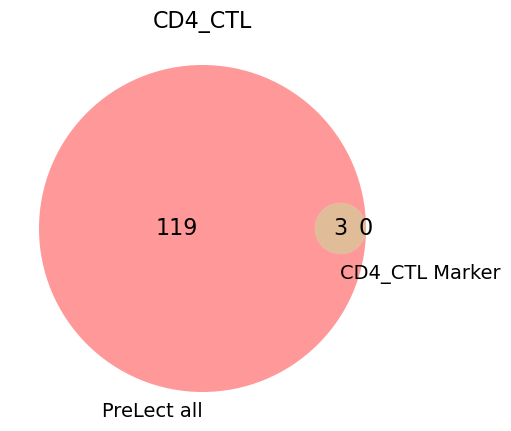

CD4_CTL Positive features common with markers: 3


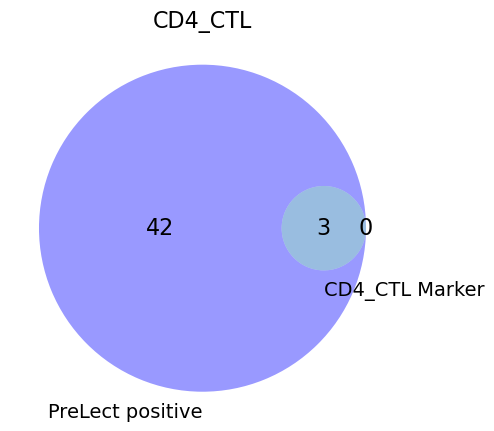

CD4_CTL_common: ['GZMH', 'GNLY', 'NKG7']
CD4_CTL_common_p: ['GZMH', 'GNLY', 'NKG7']


In [29]:
clus = 'CD4_CTL'
name = 'CD4-positive, alpha-beta cytotoxic T cell'
run_compare(clus, name, features_dict, marker_df)

CD4_Naive All features common with markers: 12


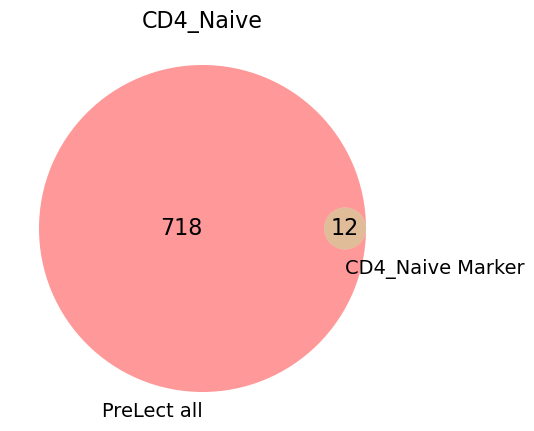

CD4_Naive Positive features common with markers: 11
Text(-0.01454097589202695, -0.5965698974312191, 'PreLect positive')
Text(0.4762169604638826, -0.1315585011413191, 'CD4_Naive Marker')


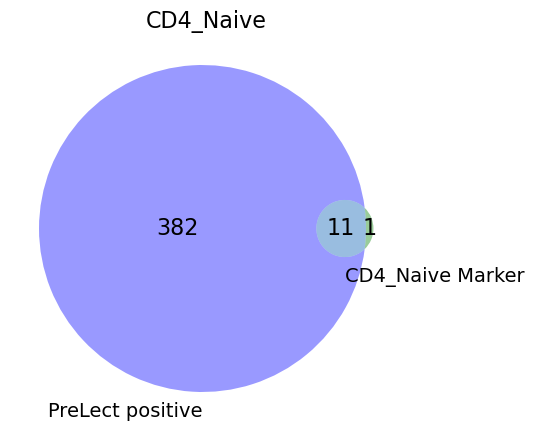

CD4_Naive_common: ['LEF1', 'TCF7', 'ITGA6', 'CD3E', 'ATM', 'KLF2', 'CD3D', 'CD4', 'SELL', 'CCR7', 'CD27', 'PTPRC']
CD4_Naive_common_p: ['LEF1', 'TCF7', 'ITGA6', 'CD3E', 'ATM', 'KLF2', 'CD3D', 'CD4', 'SELL', 'CCR7', 'PTPRC']


In [44]:
clus = 'CD4_Naive'
name = 'Naive thymus-derived CD4-positive, alpha-beta T cell'
run_compare(clus, name, features_dict, marker_df)

CD8_TCM All features common with markers: 6


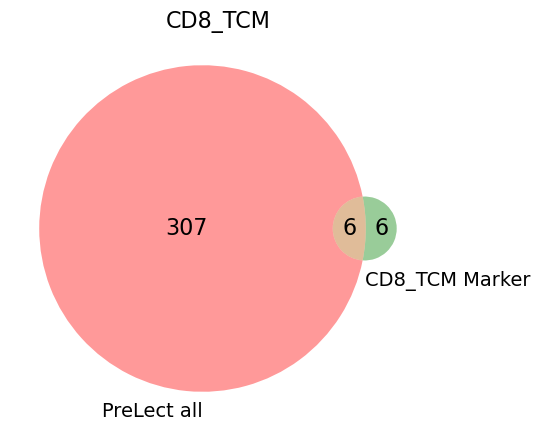

CD8_TCM Positive features common with markers: 4


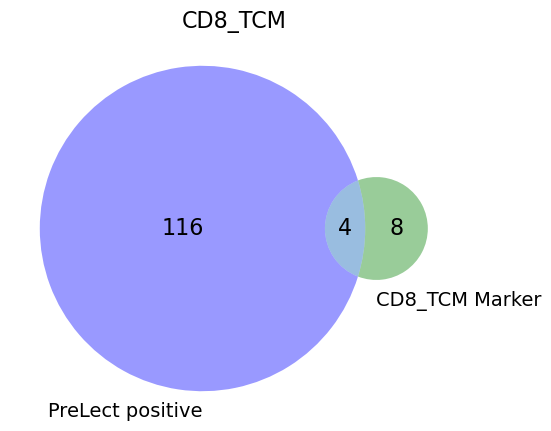

CD8_TCM_common: ['CD8B', 'GPR183', 'IL7R', 'CD8A', 'PTPRC', 'CD3G']
CD8_TCM_common_p: ['GPR183', 'CD8A', 'IL7R', 'CD8B']


In [31]:
clus = 'CD8_TCM'
name = 'Central memory CD8-positive, alpha-beta T cell'
run_compare(clus, name, features_dict, marker_df)

Plasmablast All features common with markers: 3


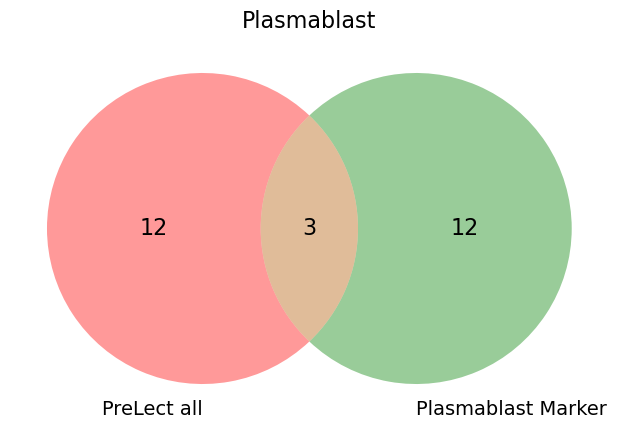

Plasmablast Positive features common with markers: 3


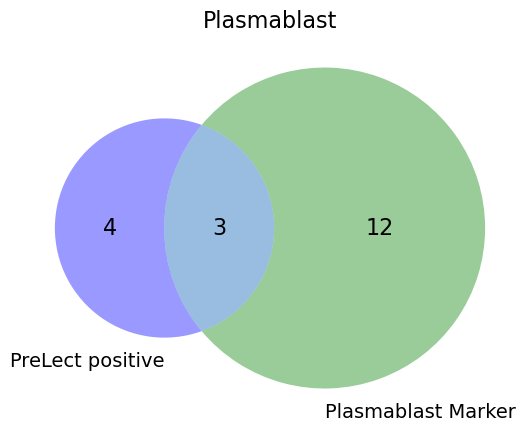

Plasmablast_common: ['JCHAIN', 'MZB1', 'IGHA1']
Plasmablast_common_p: ['JCHAIN', 'MZB1', 'IGHA1']


In [32]:
clus = 'Plasmablast'
name = 'Plasmablast'
run_compare(clus, name, features_dict, marker_df)